# Exercici Recuperació 2. Bessó digital Poppy Ergo JR - TIC TAC TOE

## 0. Crear un Jupyter notebooks, configurar una connexió amb l'escena Coppelia i fer moure tots els motors del robot.

In [625]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import sim
from sympy import *
import time

In [626]:
# Establish the connection
def connect(port):
    sim.simxFinish(-1) # just in case, close all opened connections
    clientID=sim.simxStart('127.0.0.1',port,True,True,2000,5) # Connect
    if clientID == 0: print("conectado a", port)
    else: print("no se pudo conectar")
    return clientID

# Don't forget to add a lua child script to the first joint and append the "simRemoteApi.start(19999)" line to the sysCall_init() function.
clientID = connect(19999)

conectado a 19999


In [627]:
# Require the handlers for the motors and the camera sensor
retCode,sensorHandle=sim.simxGetObjectHandle(clientID,'Vision_sensor',sim.simx_opmode_blocking)
retCode,m1=sim.simxGetObjectHandle(clientID,'m1',sim.simx_opmode_blocking)
retCode,m2=sim.simxGetObjectHandle(clientID,'m2',sim.simx_opmode_blocking)
retCode,m3=sim.simxGetObjectHandle(clientID,'m3',sim.simx_opmode_blocking)
retCode,m4=sim.simxGetObjectHandle(clientID,'m4',sim.simx_opmode_blocking)
retCode,m5=sim.simxGetObjectHandle(clientID,'m5',sim.simx_opmode_blocking)
retCode,m6=sim.simxGetObjectHandle(clientID,'m6',sim.simx_opmode_blocking)
retCode,redC1=sim.simxGetObjectHandle(clientID,'CuboRed1',sim.simx_opmode_blocking)
retCode,redC2=sim.simxGetObjectHandle(clientID,'CuboRed2',sim.simx_opmode_blocking)
retCode,redC3=sim.simxGetObjectHandle(clientID,'CuboRed3',sim.simx_opmode_blocking)
retCode,claw=sim.simxGetObjectHandle(clientID,'holder_visual',sim.simx_opmode_blocking)

print(sensorHandle, m1, m2, m3, m4, m5, m6, redC1, redC2,redC3, claw)

36 16 18 20 22 24 26 0 0 0 28


In [628]:
def get_robot_position():
    # Read position, in radians
    retCode, qr0 = sim.simxGetJointPosition(clientID, m1, sim.simx_opmode_blocking)
    retCode, qr1 = sim.simxGetJointPosition(clientID, m2, sim.simx_opmode_blocking)
    retCode, qr2 = sim.simxGetJointPosition(clientID, m3, sim.simx_opmode_blocking)
    retCode, qr3 = sim.simxGetJointPosition(clientID, m4, sim.simx_opmode_blocking)
    retCode, qr4 = sim.simxGetJointPosition(clientID, m5, sim.simx_opmode_blocking)
    retCode, qr5 = sim.simxGetJointPosition(clientID, m6, sim.simx_opmode_blocking)
    # Show position, in degrees
    q0 = qr0 * 180/np.pi
    q1 = qr1 * 180/np.pi
    q2 = qr2 * 180/np.pi
    q3 = qr3 * 180/np.pi
    q4 = qr4 * 180/np.pi
    q5 = qr5 * 180/np.pi
    print("Position of the robot in degrees: ")
    print(f"  m1: {q0}\n  m2: {q1}\n  m3: {q2}\n  m4: {q3}\n  m5: {q4}\n  m6: {q5}")

get_robot_position()

Position of the robot in degrees: 
  m1: 0.1927730313188317
  m2: -0.12152879550988319
  m3: 0.0
  m4: 179.9835032719216
  m5: 109.99771039419747
  m6: 19.99999941818584


In [629]:
def reset_motors():
    # Send the positions to the motors
    q = [0, 0, 0, 180 * np.pi/180, 110 * np.pi/180, 20 * np.pi/180]
    retCode = sim.simxSetJointTargetPosition(clientID, m1, q[0], sim.simx_opmode_oneshot)
    retCode = sim.simxSetJointTargetPosition(clientID, m2, q[1], sim.simx_opmode_oneshot)
    retCode = sim.simxSetJointTargetPosition(clientID, m3, q[2], sim.simx_opmode_oneshot)
    retCode = sim.simxSetJointTargetPosition(clientID, m4, q[3], sim.simx_opmode_oneshot)
    retCode = sim.simxSetJointTargetPosition(clientID, m5, q[4], sim.simx_opmode_oneshot)
    retCode = sim.simxSetJointTargetPosition(clientID, m6, q[5], sim.simx_opmode_oneshot)
    time.sleep(1)
reset_motors()

def open_claw(cuboid):
        retCode = sim.simxSetObjectIntParameter(clientID, cuboid, sim.sim_shapeintparam_static, 0, sim.simx_opmode_blocking)
        retCode = sim.simxSetJointTargetPosition(clientID, m6, -20 * np.pi/180, sim.simx_opmode_oneshot)
        retCode = sim.simxSetObjectParent(clientID, cuboid, -1, False, sim.simx_opmode_blocking)

def close_claw(cuboid):
    retCode = sim.simxSetObjectIntParameter(clientID, cuboid, sim.sim_shapeintparam_static, 1, sim.simx_opmode_blocking)
    retCode = sim.simxSetObjectParent(clientID, cuboid, claw, True, sim.simx_opmode_blocking)
    retCode = sim.simxSetJointTargetPosition(clientID, m6, 20 * np.pi/180, sim.simx_opmode_oneshot)

## 1. Dur a terme el processament d'imatges per identificar la forma i el color dels cubs. Pots moure les fitxes al coppelia al tauler quan està en martxa.

## Reviseu l'exercici 9 per talde realitzar aquesta part.

In [630]:
# Obtain an image from the Camera Sensor
retCode, resolution, image=sim.simxGetVisionSensorImage(clientID,sensorHandle,0,sim.simx_opmode_oneshot_wait)
len(image)

196608

In [631]:
resolution

[256, 256]

In [632]:
# It is an image with a resolution of 256*256 and each pixel is RGB
256*256*3

196608

C:\Users\USBW1IE.SEAT\AppData\Local\Temp\1\ipykernel_2656\894198614.py:1: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -70 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  img=np.array(image,dtype=np.uint8)
C:\Users\USBW1IE.SEAT\AppData\Local\Temp\1\ipykernel_2656\894198614.py:1: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -74 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  img=np.array(image,dtype=np.uint8)
C:\Users\USBW1IE.SEAT\AppData\Local\Temp\1\ipykernel_2656\894198614.py:1: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -83 to uint8 will 

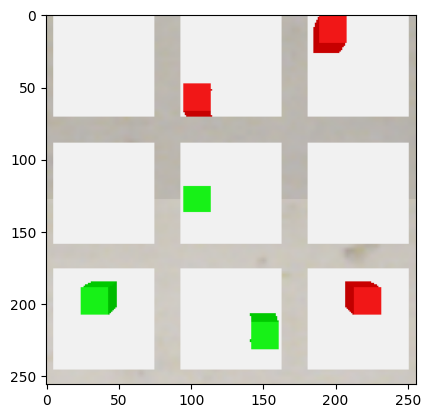

In [633]:
img=np.array(image,dtype=np.uint8)
img.resize([resolution[1],resolution[0],3])
plt.imshow(img)
plt.show()

In [634]:
# Define color ranges in RGB

# green_low = np.array([0, 100, 0], dtype=np.uint8)
# green_high = np.array([5, 195, 5], dtype=np.uint8)

green_low = np.array([0, 50, 0], dtype=np.uint8)
green_high = np.array([100, 255, 100], dtype=np.uint8)

# red_low = np.array([150, 0, 0], dtype=np.uint8)
# red_high = np.array([195, 5, 5], dtype=np.uint8)

red_low = np.array([40, 0, 0])
red_high = np.array([255, 70, 70])

In [635]:
# Thresholding
green_mask = cv2.inRange(img, green_low, green_high)
red_mask = cv2.inRange(img, red_low, red_high)

In [636]:
# Erase image noise
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
green_mask = cv2.morphologyEx(green_mask, cv2.MORPH_CLOSE, kernel)
green_mask = cv2.morphologyEx(green_mask, cv2.MORPH_OPEN, kernel)
red_mask = cv2.morphologyEx(red_mask, cv2.MORPH_CLOSE, kernel)
red_mask = cv2.morphologyEx(red_mask, cv2.MORPH_OPEN, kernel)

In [637]:
# Get contours and positions
red_pixels = cv2.bitwise_and(img, img, mask=red_mask)
green_pixels = cv2.bitwise_and(img, img, mask=green_mask)


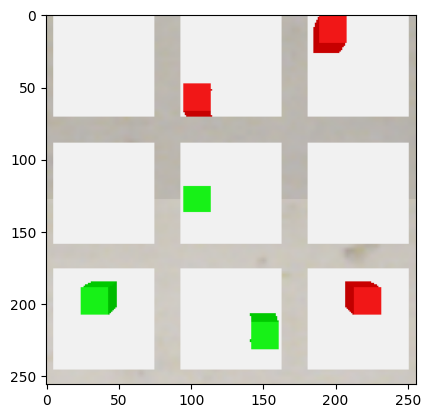

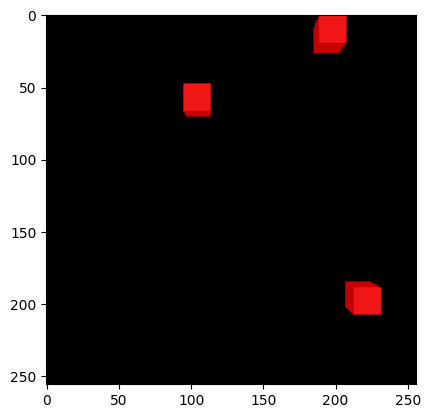

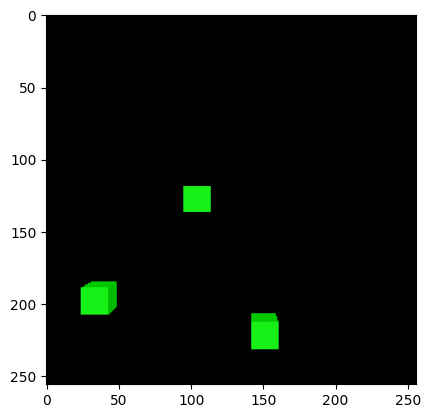

In [638]:
# Show image with contours
plt.imshow(img)
plt.show()
plt.imshow(red_pixels)
plt.show()
plt.imshow(green_pixels)
plt.show()

## 2. Determinar les posicions aproximades (tant en l'eix X com en l'eix Y).

## Coloqueu els cubs sobre el tauler. Heu de fer mesures i aplicar una regla de conversió per saber quines son les posicions reals dels cubs

In [639]:

def get_block_coordinates(image):
    # Convertir a escala de grises
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Umbralizar la imagen en escala de grises para obtener una imagen binaria
    _, binary_image = cv2.threshold(gray_image, 1, 255, cv2.THRESH_BINARY)
    
    # Encontrar contornos en la imagen binaria
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Lista para almacenar las coordenadas de los bloques
    block_coordinates = []
    
    # Iterar sobre todos los contornos encontrados
    for contour in contours:
        # Obtener el rectángulo delimitador de cada contorno
        x, y, w, h = cv2.boundingRect(contour)
        
        # Agregar las coordenadas del rectángulo delimitador a la lista de coordenadas de bloques
        block_coordinates.append(((x, y), (x + w, y + h)))
    
    return block_coordinates

red_block_coordinates = get_block_coordinates(red_pixels)
green_block_coordinates = get_block_coordinates(green_pixels)

# Imprimimos las coordenadas de los bloques
# if red_block_coordinates:
#     print("Coordenadas de los bloques rojos:")
#     for index, block_coord in enumerate(red_block_coordinates):
#         print(f"Bloque {index + 1}: (top-left, bottom-right) -> {block_coord}")
# else:
#     print("No se encontraron bloques.")

# if green_block_coordinates:
#     print("Coordenadas de los bloques verdes:")
#     for index, block_coord in enumerate(green_block_coordinates):
#         print(f"Bloque {index + 1}: (top-left, bottom-right) -> {block_coord}")
# else:
#     print("No se encontraron bloques.")

def obtener_coordenadas_bloques(coordenadas):
    lista_coordenadas = []
    if coordenadas:
        for index, block_coord in enumerate(coordenadas):
            ((x1, y1), (x2, y2)) = block_coord
            x1 = round(x1 / 100)
            y1 = round(y1 / 100)
            y1 = (2 - y1) % 3 # invertimos verticalmente
            # x2 = round(x2 / 100) # no usamos borde inferior derecho porque no deberia ser necesario
            # y2 = round(y2 / 100)
            lista_coordenadas.append((x1, y1))
    return lista_coordenadas

# Obtener coordenadas de los bloques rojos
coordenadas_rojos = obtener_coordenadas_bloques(red_block_coordinates)

# Obtener coordenadas de los bloques verdes
coordenadas_verdes = obtener_coordenadas_bloques(green_block_coordinates)



# Imprimir las coordenadas
print("Coordenadas de los bloques rojos:")
for coordenadas in coordenadas_rojos:
    print(coordenadas)

print("\nCoordenadas de los bloques verdes:")
for coordenadas in coordenadas_verdes:
    print(coordenadas)




Coordenadas de los bloques rojos:
(2, 0)
(1, 2)
(2, 2)

Coordenadas de los bloques verdes:
(1, 0)
(0, 0)
(1, 1)


In [640]:

# print("Green position in the scene: ", green_x, ", ", green_y)
# print("Red position in the scene: ", red_x, ", ", red_y)


## 3. Realitzar cinemàtica inversa per poder arribar als cubs vermells i recollir-los i col·locar-los al tauler.
## Podeu aprofitar el codi que teniu a continuació que permet aproparse a la posició x, y i z geomètricament.

In [641]:
import math

def ik(destination):
    # Cinemàtica Inversa d un robot antropomorfic 3 eixos
    
    # Posición (x,y,z)
    # Coordenadas Destino
    x = destination[0];
    y = destination[1];
    z = destination[2];
    
    b=0.15; #longitud de brazo L1 + extensió fins al dummy
    ab=0.05; #longitud de antebrazo L2
    H=0.05; #altura de base
    
    
    Axis1=math.atan2(y,x);
    xprima=math.sqrt(math.pow(x,2)+math.pow(y,2));
    yprima=z;
    B=xprima;
    A=z-H;
    
    Hip=math.sqrt(math.pow(A,2)+math.pow(B,2));
    alfa=math.atan2(A,B);
    beta=math.acos((math.pow(b,2)-math.pow(ab,2)+math.pow(Hip,2))/(2*b*Hip));
    
    Axis2=alfa+beta;
    
    gamma=math.acos((math.pow(b,2)+math.pow(ab,2)-math.pow(Hip,2))/(2*b*ab));
    
    Axis3=gamma;
    
    Axis1Grados=Axis1*180/math.pi; #Giro base Grados
    Axis2Grados=90-Axis2*180/math.pi; #Giro brazo Grados
    Axis3Grados=180-Axis3*180/math.pi; #Giro antebrazo Grados
    
    print("    theta1 =",Axis1Grados,"º");
    print("    theta2 =",Axis2Grados,"º");
    print("    theta3 =",Axis3Grados,"º");

    return [Axis1Grados*np.pi/180,Axis2Grados*np.pi/180,Axis3Grados*np.pi/180,0,110*np.pi/180,0]

def move(q):
    retCode = sim.simxSetJointTargetPosition(clientID, m1, q[0], sim.simx_opmode_oneshot)
    retCode = sim.simxSetJointTargetPosition(clientID, m2, q[1], sim.simx_opmode_oneshot)
    retCode = sim.simxSetJointTargetPosition(clientID, m3, q[2], sim.simx_opmode_oneshot)


    time.sleep(1)

def geometric_resolution(p):
    try:
        q = ik(p)
        move(q)
    except:
        print('No solution')
        q=[0,0,0,0,0,0]
    return q

In [642]:
# Go for red cube
#aprofiteu les funions per tal d'arribar a cada una de les posicions
# el robot juga amb vermelles
p = [0.1, 0, 0.1]
print("Destination:")
print("    x:",p[0])
print("    y:",p[1])
print("    z:",p[2],"\n")

open_claw(redC1)
time.sleep(2)

print("IK:")
q = geometric_resolution(p)
time.sleep(2)
close_claw(redC1)
time.sleep(1)
# Let red cube
q = geometric_resolution([0.14, 0, 0.12])

time.sleep(1)
open_claw(redC1)

time.sleep(1)
reset_motors()

Destination:
    x: 0.1
    y: 0
    z: 0.1 

IK:
    theta1 = 0.0 º
    theta2 = 49.12267334620933 º
    theta3 = 146.44269023807928 º


In [643]:
ik([0.1, -0.175, 0.01])

ValueError: math domain error

## 4. Realitzeu el codi per jugar al TicTacToe contra el robot, el Robot ha de jugar amb vermelles i tú pot jugar amb les altres. Pot començar el Robot posant la primera 

In [645]:
def getState():
    # Obtain an image from the Camera Sensor
    retCode, resolution, image=sim.simxGetVisionSensorImage(clientID,sensorHandle,0,sim.simx_opmode_oneshot_wait)
    img=np.array(image,dtype=np.uint8)
    img.resize([resolution[1],resolution[0],3])
    # plt.imshow(img)
    # plt.show()

    # Define color ranges in RGB
    green_low = np.array([0, 50, 0], dtype=np.uint8)
    green_high = np.array([100, 255, 100], dtype=np.uint8)

    red_low = np.array([40, 0, 0])
    red_high = np.array([255, 70, 70])

    # Thresholding
    green_mask = cv2.inRange(img, green_low, green_high)
    red_mask = cv2.inRange(img, red_low, red_high)

    # Erase image noise
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
    green_mask = cv2.morphologyEx(green_mask, cv2.MORPH_CLOSE, kernel)
    green_mask = cv2.morphologyEx(green_mask, cv2.MORPH_OPEN, kernel)
    red_mask = cv2.morphologyEx(red_mask, cv2.MORPH_CLOSE, kernel)
    red_mask = cv2.morphologyEx(red_mask, cv2.MORPH_OPEN, kernel)

    # Get contours and positions
    red_pixels = cv2.bitwise_and(img, img, mask=red_mask)
    green_pixels = cv2.bitwise_and(img, img, mask=green_mask)

    # plt.imshow(img)
    # plt.show()
    # plt.imshow(red_pixels)
    # plt.show()
    # plt.imshow(green_pixels)
    # plt.show()

    red_block_coordinates = get_block_coordinates(red_pixels)
    green_block_coordinates = get_block_coordinates(green_pixels)

    # Obtener coordenadas de los bloques en el tablero 3x3
    coordenadas_rojos = obtener_coordenadas_bloques(red_block_coordinates)
    coordenadas_verdes = obtener_coordenadas_bloques(green_block_coordinates)

    return coordenadas_rojos, coordenadas_verdes

In [655]:
def generateMatrix(coordenadas):
    # Inicializar la matriz de 3x3 con ceros
    matriz = [[0 for _ in range(3)] for _ in range(3)]
    
    # Marcar las posiciones especificadas con un 1
    for x, y in coordenadas:
        if 0 <= x < 3 and 0 <= y < 3:  # Verificar que las coordenadas estén dentro del rango válido
            matriz[y][x] = 1
    
    return matriz

In [658]:
def translateCoords(destination):
    x_des, y_des = destination

    x_correlations = {
        0: 0.3,
        1: 0.2,
        3: 0.1
    }

    y_correlations = {
        0: -0.1,
        1: 0,
        3: 0.1
    }

    x = x_correlations.get(x_des, None)
    y = y_correlations.get(y_des, None)   
    z = 0.01  
    
    return [x, y, z]

redBlocks = [[0.1, -0.175, 0.01], [0.05, -0.175, 0.01], [0, -0.175, 0.01]]
def getAvailableRedBlock():
    if redBlocks:
        return redBlocks.pop()

def moveBlock(destination):
    p = translateCoords(destination)

    open_claw(redC1)
    time.sleep(2)

    print("IK:")
    q = geometric_resolution(getAvailableRedBlock())
    time.sleep(2)
    close_claw(redC1)
    time.sleep(1)
    # Let red cube
    q = geometric_resolution(p)

    time.sleep(1)
    open_claw(redC1)

    time.sleep(1)
    reset_motors()

In [659]:
def compruebaGanador(matriz):
    # Comprobar filas
    for fila in matriz:
        if fila == [1, 1, 1]:
            return True
    
    # Comprobar columnas
    for col in range(3):
        if matriz[0][col] == matriz[1][col] == matriz[2][col] == 1:
            return True
    
    # Comprobar diagonales
    if matriz[0][0] == matriz[1][1] == matriz[2][2] == 1:
        return True
    if matriz[0][2] == matriz[1][1] == matriz[2][0] == 1:
        return True
    
    # Si no hay ganador
    return False

def compruebaGanadorMixedMatrix(matrix, player):
    # Comprobar filas
    for row in matrix:
        if row == [player, player, player]:
            return True
    # Comprobar columnas
    for col in range(3):
        if matrix[0][col] == matrix[1][col] == matrix[2][col] == player:
            return True
    # Comprobar diagonales
    if matrix[0][0] == matrix[1][1] == matrix[2][2] == player:
        return True
    if matrix[0][2] == matrix[1][1] == matrix[2][0] == player:
        return True
    return False

In [660]:
# Crear una matriz combinada
def combineMatrix(userMatrix, robotMatrix):
    combinedMatrix = [[0 for _ in range(3)] for _ in range(3)]
    for i in range(3):
        for j in range(3):
            if userMatrix[i][j] == 1:
                combinedMatrix[i][j] = 1
            elif robotMatrix[i][j] == 1:
                combinedMatrix[i][j] = 2
    return combinedMatrix

# Función para encontrar posibles movimientos
def find_possible_moves(matrix):
    moves = []
    for i in range(3):
        for j in range(3):
            if matrix[i][j] == 0:
                moves.append((i, j))
    return moves

def defineNewPosition(userMatrix, robotMatrix):
    combinedMatrix = combineMatrix(userMatrix, robotMatrix)
    # Intentar ganar en la siguiente jugada
    possible_moves = find_possible_moves(combinedMatrix)
    for move in possible_moves:
        combinedMatrix[move[0]][move[1]] = 2
        if compruebaGanadorMixedMatrix(combinedMatrix, 2):
            return move
        combinedMatrix[move[0]][move[1]] = 0

    # Bloquear al usuario si está a punto de ganar
    for move in possible_moves:
        combinedMatrix[move[0]][move[1]] = 1
        if compruebaGanadorMixedMatrix(combinedMatrix, 1):
            return move
        combinedMatrix[move[0]][move[1]] = 0

    # Elegir el centro si está libre
    if combinedMatrix[1][1] == 0:
        return (1, 1)

    # Tomar una esquina si está libre
    for move in [(0, 0), (0, 2), (2, 0), (2, 2)]:
        if combinedMatrix[move[0]][move[1]] == 0:
            return move

    # Tomar cualquier otro movimiento disponible
    return possible_moves[0]

In [680]:
def detectNewMove(previousMatrix, matrix):
    for i in range(3):
        for j in range(3):
            if previousMatrix[i][j] == 0 and matrix[i][j] == 1:
                return (i, j)
    return None

In [697]:
def game():
    previousUserMatrix = [[0,0,0],[0,0,0],[0,0,0]]
    previousRobotMatrix = [[0,0,0],[0,0,0],[0,0,0]]
    turno = 0
    end = False

    print("Starting game")

    while(end == False and turno <= 4):
        turno = turno + 1 
        print("------------------Turno ", turno ,": Robot------------------")
        #1: Mover bloque
        robotMove = False

        newPosition = defineNewPosition(previousUserMatrix, previousRobotMatrix)
        print("[Robot] newPosition: ", newPosition)

        # moveBlock(newPosition)
        # time.sleep(1)

        print("Block moved, checking...")

        coordenadas_rojos, coordenadas_verdes = getState()
        # print("coordenadas_rojos: ", coordenadas_rojos)
        robotMatrix = generateMatrix(coordenadas_rojos)

        move = detectNewMove(previousRobotMatrix, robotMatrix)

        if(move):
            print("Movimiento del Robot detectado en ", move)
            previousRobotMatrix = robotMatrix
            robotMove = True
        else:
            print("El robot no pudo mover el bloque. Por favor, posicionelo en la posición ", newPosition)

        ###################
        # THIS SOULD NOT BE NEEDED
        while(robotMove == False):
            time.sleep(5)
            coordenadas_rojos, coordenadas_verdes = getState()
            # print("coordenadas_rojos: ", coordenadas_rojos)
            robotMatrix = generateMatrix(coordenadas_rojos)                

            # print("Matriz robot:")
            # for fila in robotMatrix:
            #     print(fila)

            move = detectNewMove(previousRobotMatrix, robotMatrix)

            if(move):
                print("Movimiento del Robot detectado en ", move)
                if(move != newPosition):
                    print("Por favor, no ponga el bloque en ", move, ", muévalo a ", newPosition)
                else:
                    previousRobotMatrix = robotMatrix
                    robotMove = True
        ###################
        print("Bloque correctamente posicionado en ", newPosition)

        if(turno >= 5):
            if(compruebaGanador(robotMatrix)):
                end = True
                winner = "Robot"
                break

        # print("Matriz robot:")
        # for fila in robotMatrix:
        #     print(fila)

        #2: Esperar a que usuario mueva ficha
        turno = turno + 1
        print("------------------Turno ", turno ,": Usuario------------------")

        userMove = False

        while(userMove == False):
            time.sleep(5)
            coordenadas_rojos, coordenadas_verdes = getState()
            # print("coordenadas_verdes: ", coordenadas_verdes)
            userMatrix = generateMatrix(coordenadas_verdes)                

            # print("Matriz usuario:")
            # for fila in userMatrix:
            #     print(fila)

            move = detectNewMove(previousUserMatrix, userMatrix)

            if(move):
                print("Movimiento del Usuario detectado en ", move)
                previousUserMatrix = userMatrix
                userMove = True

        if(turno >= 5):
            if(compruebaGanador(userMatrix)):
                end = True
                winner = "User"
                break

    if(end):
        print(winner, " wins!")
    else:
        print("No one wins... GG")

In [698]:
clientID = connect(19999)

game()

conectado a 19999
Starting game
------------------Turno  1 : Robot------------------
[Robot] newPosition:  (1, 1)
Block moved, checking...


C:\Users\USBW1IE.SEAT\AppData\Local\Temp\1\ipykernel_2656\1579440197.py:4: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -70 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  img=np.array(image,dtype=np.uint8)
C:\Users\USBW1IE.SEAT\AppData\Local\Temp\1\ipykernel_2656\1579440197.py:4: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -74 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  img=np.array(image,dtype=np.uint8)
C:\Users\USBW1IE.SEAT\AppData\Local\Temp\1\ipykernel_2656\1579440197.py:4: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -83 to uint8 wi

El robot no pudo mover el bloque. Por favor, posicionelo en la posición  (1, 1)
Movimiento del Robot detectado en  (1, 1)
Bloque correctamente posicionado en  (1, 1)
------------------Turno  2 : Usuario------------------
Movimiento del Usuario detectado en  (0, 0)
------------------Turno  3 : Robot------------------
[Robot] newPosition:  (0, 2)
Block moved, checking...
El robot no pudo mover el bloque. Por favor, posicionelo en la posición  (0, 2)
Movimiento del Robot detectado en  (0, 2)
Bloque correctamente posicionado en  (0, 2)
------------------Turno  4 : Usuario------------------
Movimiento del Usuario detectado en  (0, 1)
------------------Turno  5 : Robot------------------
[Robot] newPosition:  (2, 0)
Block moved, checking...
El robot no pudo mover el bloque. Por favor, posicionelo en la posición  (2, 0)
Movimiento del Robot detectado en  (2, 0)
Bloque correctamente posicionado en  (2, 0)
Robot  wins!
